<a href="https://colab.research.google.com/github/mounsifelatouch/oibsip_taskno3/blob/master/CarPricePredictionWithMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oasis Infobyte Internship (15 October - 15 November, 2023)
## Data Science Internship
### <u>`Task 3`</u> : `CAR PRICE PREDICTION WITH MACHINE LEARNING`
#### `MOUNSIF EL ATOUCH`

In [1]:
! pip install lazypredict

[What is Lazy Predict?](https://www.analyticsvidhya.com/blog/2021/05/lazy-predict-best-suitable-model-for-you/)


In [2]:
# Needed packages
import pandas as pd                 # For data manipulation and analysis
import numpy as np                  # For numerical computations and handling arrays
import matplotlib.pyplot as plt     # For data visualization
import seaborn as sns               # For enhanced data visualization
import plotly.express as px
from sklearn.model_selection import train_test_split      # For dataset splitting
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings("ignore")                         # Disable warnings
%matplotlib inline

In [3]:
def plot_bar(df, x, y, title):
    plt.figure(figsize=(18, 4))
    sns.barplot(x=df[x], y=df[y])
    plt.title(title, fontsize=12, fontweight='bold')
    plt.tick_params(axis='x', rotation=90, labelsize=10)
    plt.tick_params(axis='y', labelsize=10)
    plt.xlabel(x, fontsize=10)
    plt.ylabel(y, fontsize=10)
    return plt.show()

In [4]:
def plot_count(df, x, hue, title):
    plt.figure(figsize=(18, 4))
    sns.countplot(x=df[x], hue=df[hue])
    plt.title(f'{title} {x} by {hue}', fontsize=12, fontweight='bold')
    plt.tick_params(axis='x', labelrotation=90, labelsize=10)
    plt.xlabel(x, fontsize=10)
    return plt.show()

In [5]:
# Download the dataset
! wget https://raw.githubusercontent.com/mounsifelatouch/oibsip_taskno3/master/car%20data.csv

--2023-10-29 15:32:39--  https://raw.githubusercontent.com/mounsifelatouch/oibsip_taskno3/master/car%20data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16908 (17K) [text/plain]
Saving to: ‘car data.csv’

car data.csv        100%[===================>]  16.51K  --.-KB/s    in 0.001s  

2023-10-29 15:32:39 (28.6 MB/s) - ‘car data.csv’ saved [16908/16908]



In [6]:
# Load the dataset
data = pd.read_csv("/content/car data.csv")

In [7]:
# Disply the first few rows of the dataset
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
# Check for missing values
data.isnull().sum()     # No missing value is available

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

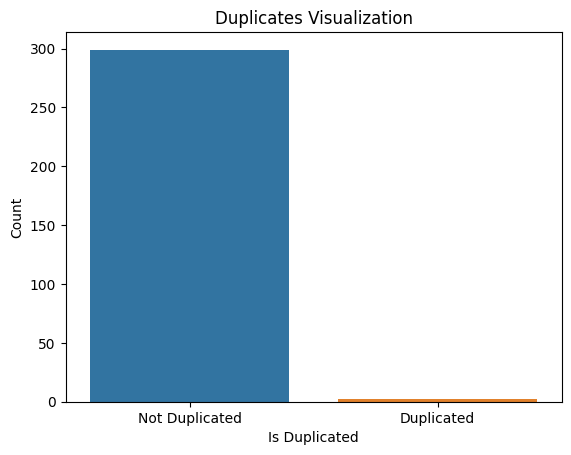

In [9]:
# Check for duplicates and create a new column "Is_Duplicated"
data['Is_Duplicated'] = data.duplicated()

# Create a count plot to visualize duplicates
sns.countplot(x='Is_Duplicated', data=data)
plt.xlabel('Is Duplicated')
plt.ylabel('Count')
plt.title('Duplicates Visualization')
plt.xticks([0, 1], ['Not Duplicated', 'Duplicated'])  # Customize x-axis labels
plt.show()

In [10]:
# Drop the "Is_Duplicated" column
data.drop(columns=['Is_Duplicated'], inplace=True)

Here, we'ill drop duplicates to enhance data quality, improve analysis outcomes, and ensure the integrity and accuracy of the dataset.

In [11]:
# Drop duplicates
data = data.drop_duplicates(subset=['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'])

In [12]:
# Dataset's shape
data.shape      #(rows=299, columns=9)

(299, 9)

In [13]:
# Check datatype
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [14]:
# Check the number of unique values of each column
data.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [15]:
# Check statistics of data set
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.00,299.00,299.00,299.00,299.00
mean,2013.62,4.59,7.54,36916.75,0.04
std,2.90,4.98,8.57,39015.17,0.25
min,2003.00,0.10,0.32,500.00,0.00
25%,2012.00,0.85,1.20,15000.00,0.00
50%,2014.00,3.51,6.10,32000.00,0.00
75%,2016.00,6.00,9.84,48883.50,0.00
max,2018.00,35.00,92.60,500000.00,3.00


<u>`Comments :`</u> <br/>
* The dataset contains information about cars spanning the years `from 2003 to 2018`, indicating a range of car data over a period of 15 years.

* The average selling price is approximately `4.59`.

* The minimum and maximum selling price observed in the dataset are respectively `0.1` and `35`.

* The "Owner" column ranges from 0 to 3, with a mean of approximately 0.04. This indicates that `most cars in the dataset have either no previous owners or very few previous owners`.

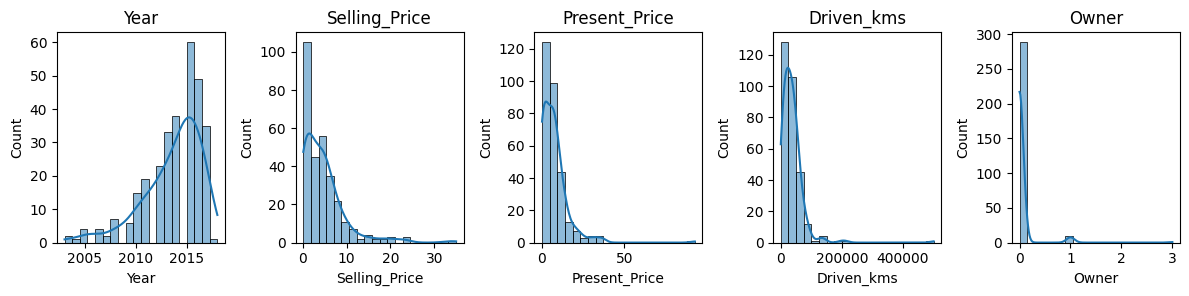

In [16]:
# Distribution of Numerical Features
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']
categorical_columns = ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']

plt.figure(figsize=(12, 8))
for feature in numerical_columns:
    plt.subplot(3, 5, numerical_columns.index(feature) + 1)
    sns.histplot(data=data[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

<u>`Comments :`</u>
* The cars with the lowest price are generally the most commonly used.
* People generally prefer to sell cars that have either no previous owners or a very limited number of previous owners.
* As the mileage increases, the price of cars generally tends to decrease. However, the majority of users still prefer cars with lower prices.

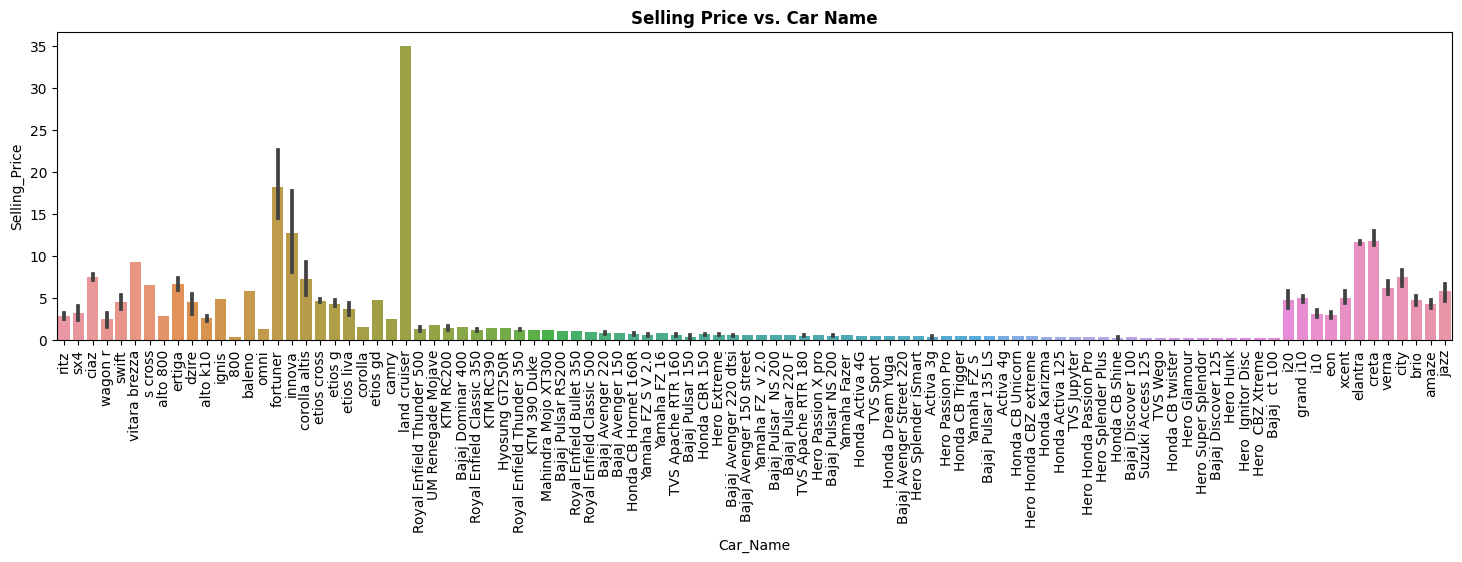

' The car with the highest price is the Land Cruiser. '

In [17]:
# Selling Price Value by Car Name
plot_bar(data, 'Car_Name','Selling_Price','Selling Price vs. Car Name')

''' The car with the highest price is the Land Cruiser. '''

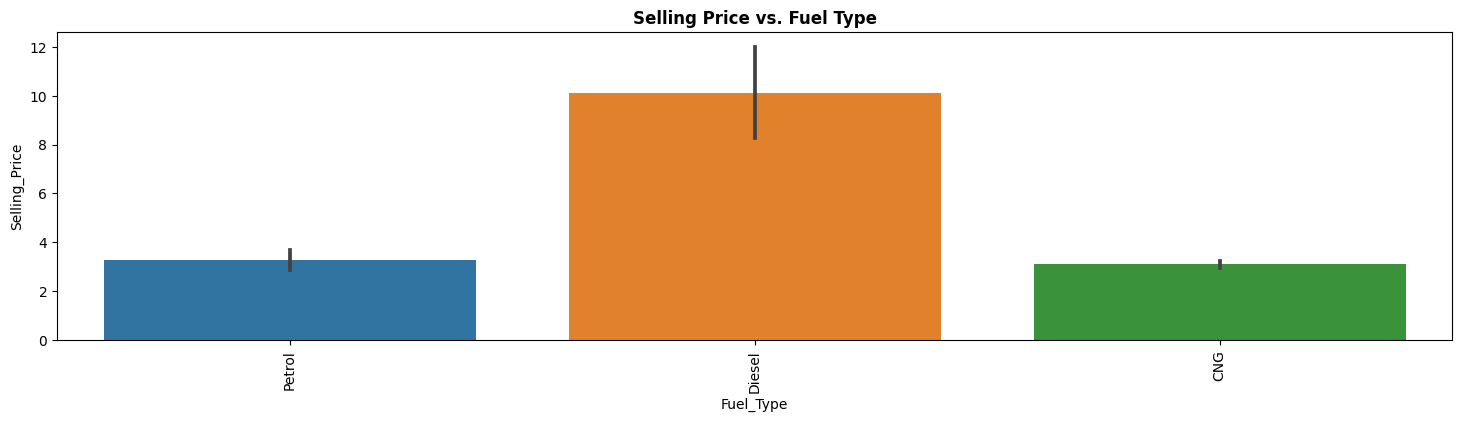

In [18]:
# Selling Price Value by Fuel Type
plot_bar(data, 'Fuel_Type','Selling_Price','Selling Price vs. Fuel Type')

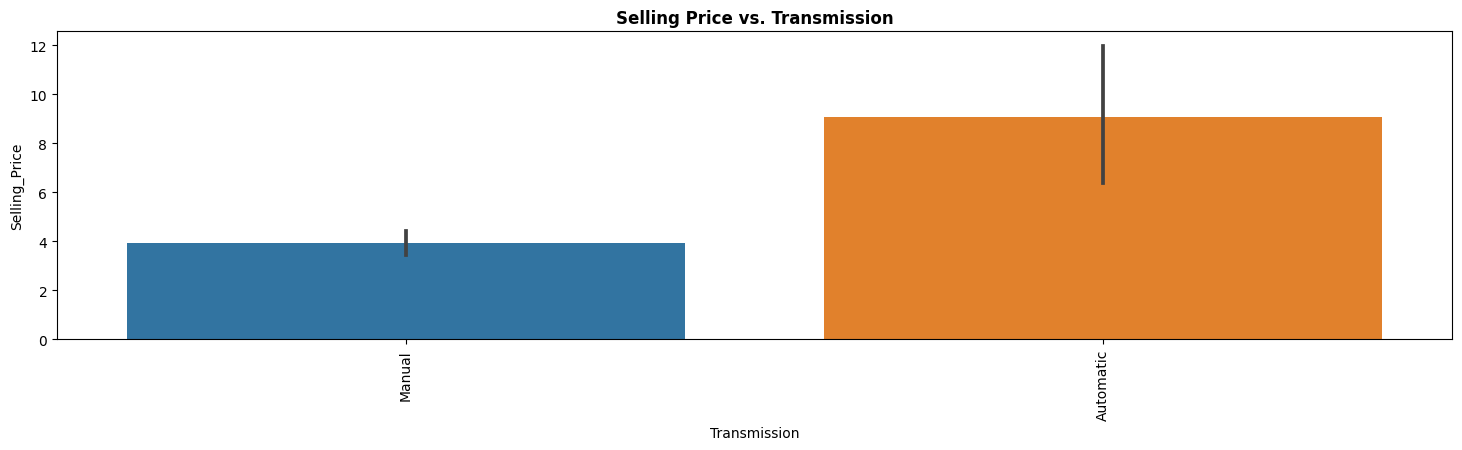

In [19]:
# Selling Price Value by Transmission
plot_bar(data, 'Transmission','Selling_Price','Selling Price vs. Transmission')

<u>`Comments :`</u> </br>
Cars equipped with `automatic transmission` tend to be the most expensive, along with those that feature a `Diesel fuel type`.

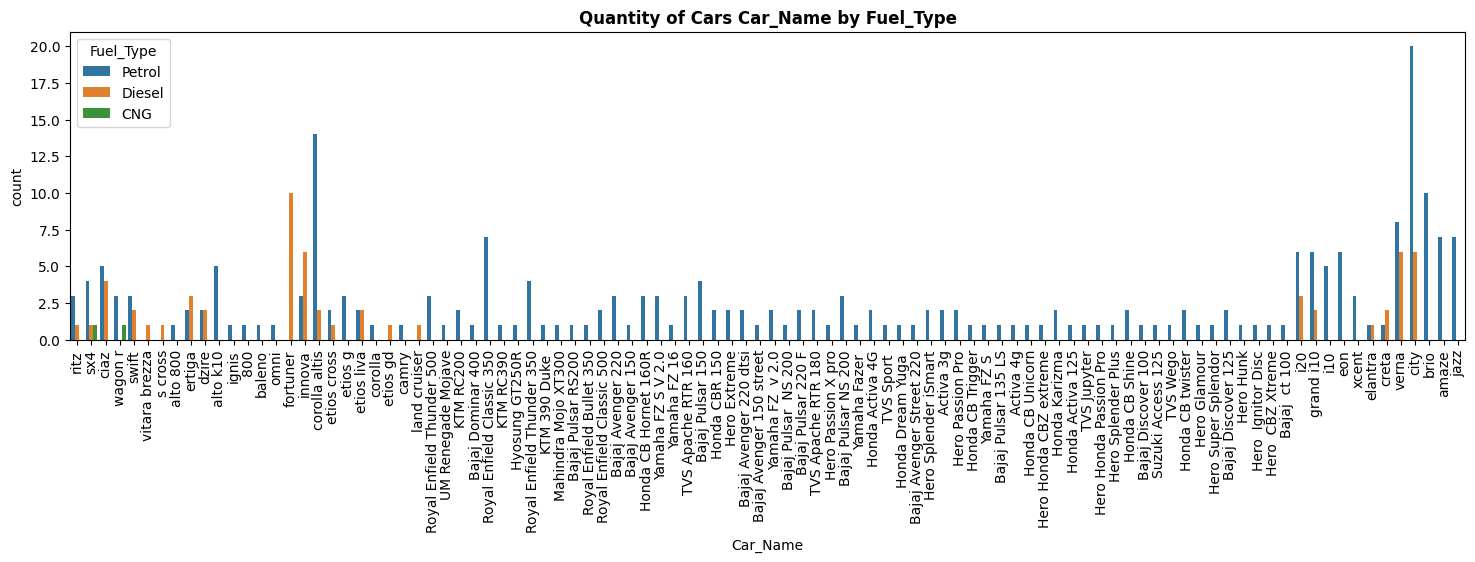

In [20]:
plot_count(data, 'Car_Name', 'Fuel_Type', 'Quantity of Cars')

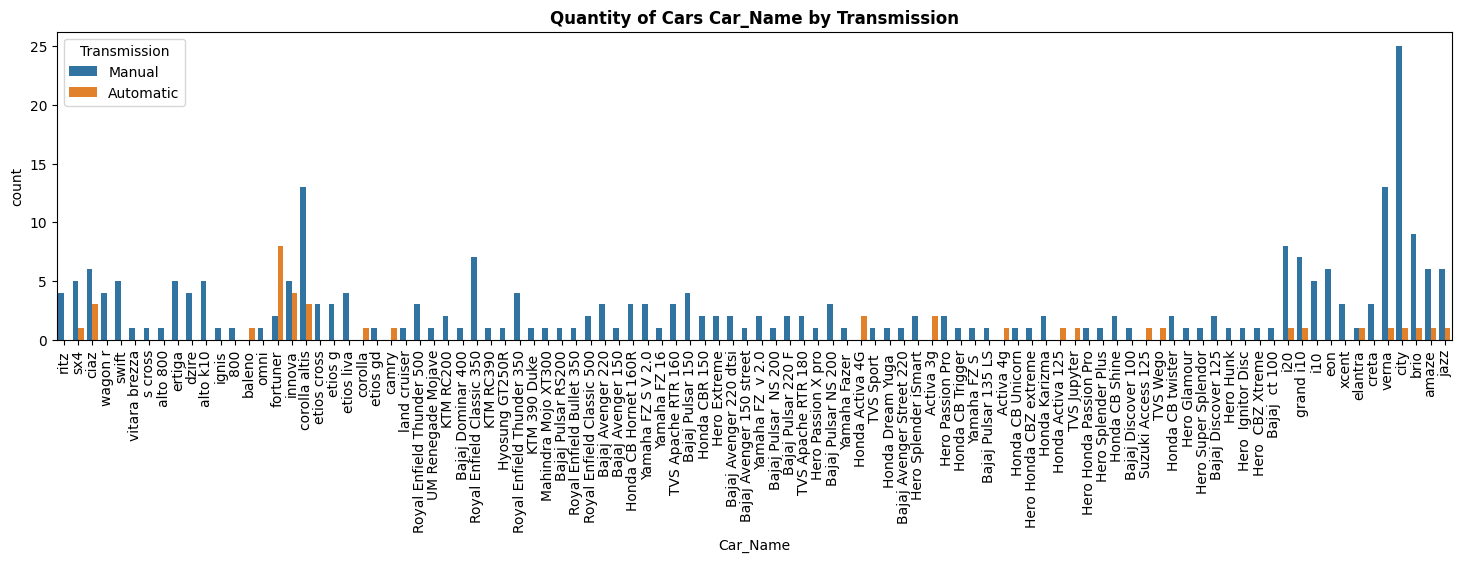

In [21]:
plot_count(data, 'Car_Name', 'Transmission', 'Quantity of Cars')

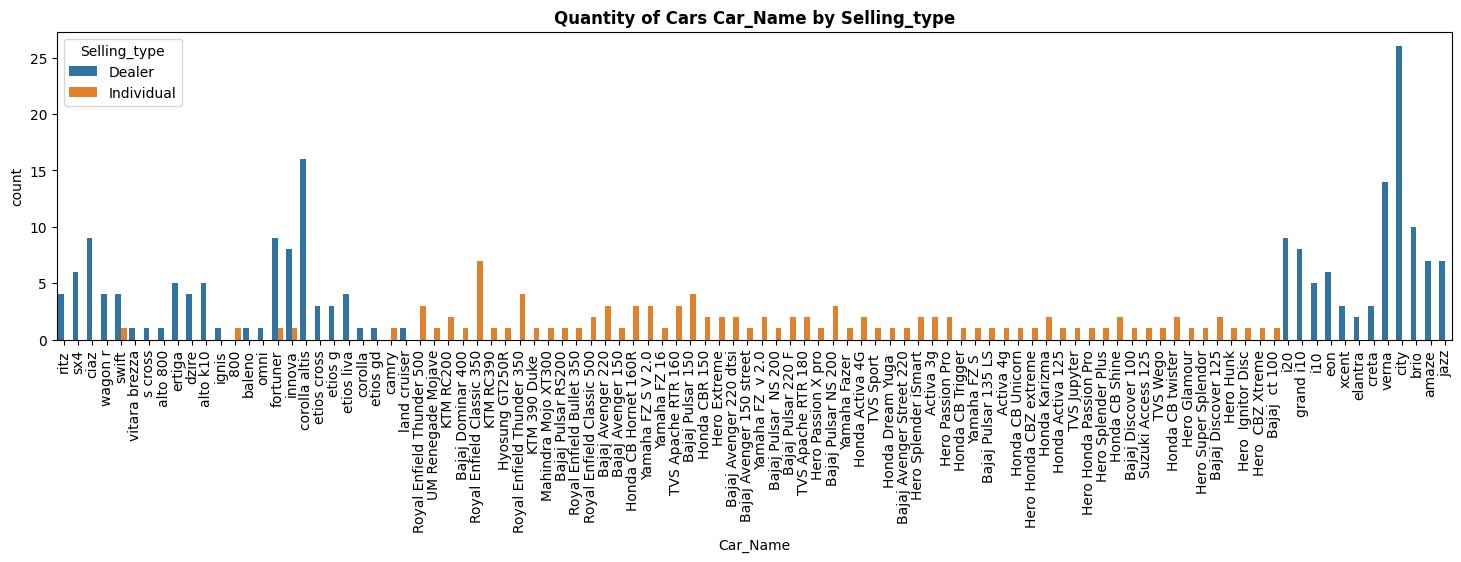

In [22]:
plot_count(data, 'Car_Name', 'Selling_type', 'Quantity of Cars')

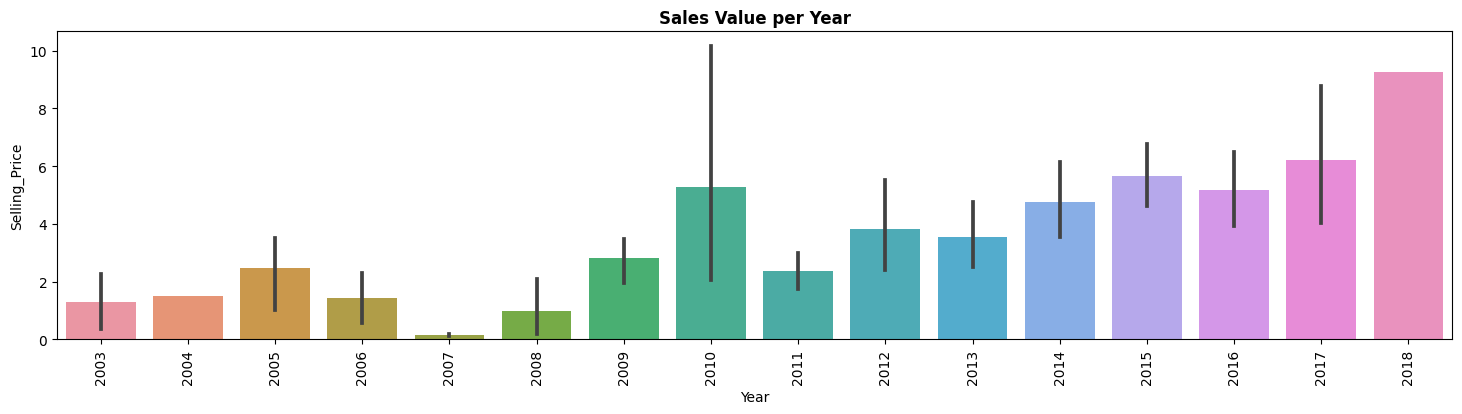

' Newest cars often come with advanced features and technologies, making them more expensive compared to older models. '

In [23]:
plot_bar(data, 'Year', 'Selling_Price', 'Sales Value per Year')

''' Newest cars often come with advanced features and technologies, making them more expensive compared to older models. '''

<u>`Comments :`</u>
* Cars that run on petrol and have manual transmission are often in high demand due to their lower price.
* Users generally prefer to sell their cars through dealers rather than selling them directly as individuals.
* `city` tend to have the highest frequency of sales.
* Newest cars often come with advanced features and technologies, making them more expensive compared to older models.

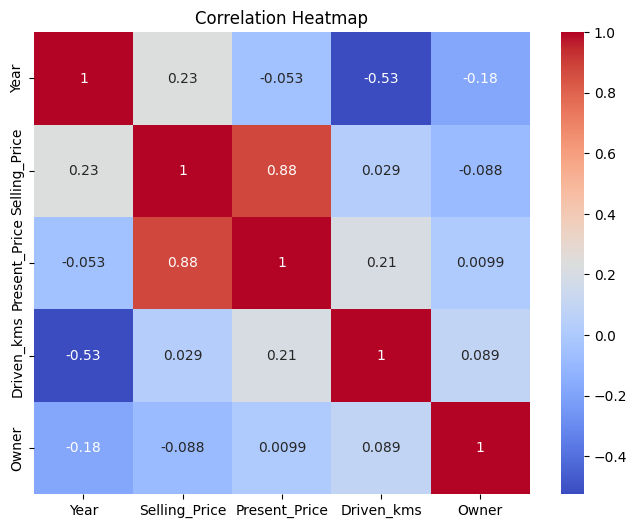

In [24]:
# Correlation Analysis
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

`Selling_Price` and `Present_Price` have a strong positive correlation coefficient of 0.876305, indicating a significant positive relationship between the selling price and the present price of the cars.

In [25]:
print("Numerical Columns \t", numerical_columns)
print("Categorical Columns \t", categorical_columns)

Numerical Columns 	 ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']
Categorical Columns 	 ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']


In [26]:
# Encoding categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [27]:
data.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0


In [28]:
# Feature scaling
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [29]:
# Train the model
# Splitting the dataset
X = data.drop(['Selling_Price', 'Car_Name'], axis=1)
y = data['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test, y_pred)

print(f"R-squared (R2): {r2_square:.2f}")
print(f'Mean Squared Error (MSE): {mse:.2f}')

R-squared (R2): 0.74
Mean Squared Error (MSE): 0.27


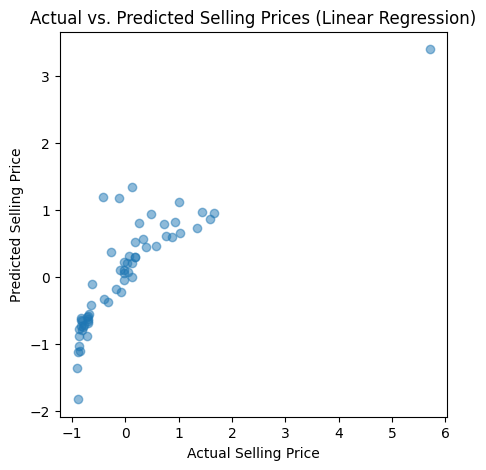

In [31]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Prices (Linear Regression)')
plt.show()

### `Lazy Predict`
Here, we'll use Lazy Predict to train and evaluate a wide range of machine learning models.

In [32]:
X, y = shuffle(data.drop(['Selling_Price', 'Car_Name'], axis=1), data['Selling_Price'], random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:07<00:00,  5.57it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 164
[LightGBM] [Info] Number of data points in the train set: 269, number of used features: 6
[LightGBM] [Info] Start training from score 0.008875
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [33]:
models.head(10)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.97,0.97,0.12,0.59
RandomForestRegressor,0.96,0.97,0.12,0.52
ExtraTreesRegressor,0.96,0.97,0.13,0.54
SVR,0.96,0.97,0.13,0.02
NuSVR,0.96,0.97,0.13,0.06
HistGradientBoostingRegressor,0.95,0.96,0.14,2.83
GradientBoostingRegressor,0.95,0.96,0.14,0.31
LGBMRegressor,0.95,0.96,0.15,0.22
BaggingRegressor,0.95,0.96,0.15,0.06


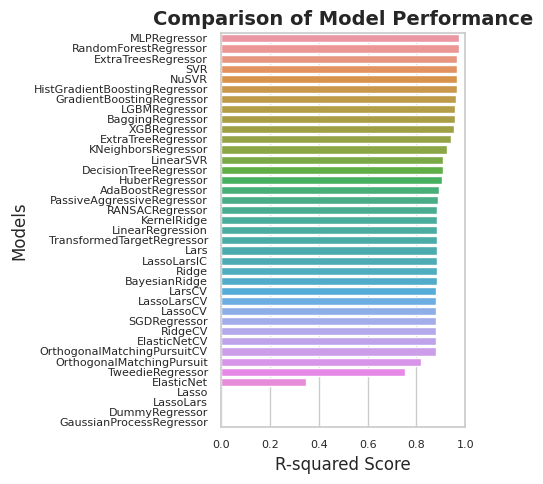

' https://analyticsindiamag.com/visualizing-and-comparing-ml-models-using-lazypredict/ '

In [34]:
# Set the figure size and style
plt.figure(figsize=(5, 5))
sns.set_theme(style="whitegrid")

# Create the bar plot
ax = sns.barplot(y=models.index, x="R-Squared", data=models)
ax.set(xlim=(0, 1))

# Set the axis text size
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)

# Set the axis labels and title
ax.set_xlabel('R-squared Score', fontsize=12)
ax.set_ylabel('Models', fontsize=12)
ax.set_title('Comparison of Model Performance', fontsize=14, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

''' https://analyticsindiamag.com/visualizing-and-comparing-ml-models-using-lazypredict/ '''

Given a priority on accuracy and a willingness to tolerate longer training times, the best-performing model appears to be `MLPRegressor`, as it has an `R-squared value of 0.97`. MLPRegresso is a neural network-based regression model that is capable of capturing complex relationships between the input features and the target variable.